<a href="https://colab.research.google.com/github/kamil671/projekt_zaliczeniowy_kamil_budze-_sztuczna-inteligencja-grupa-1/blob/main/zaliczenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import spacy

In [6]:
df = pd.read_csv('dane1.csv')

In [7]:
day_map = {
    'Mon': 'Poniedziałek', 'Tue': 'Wtorek', 'Wed': 'Środa', 'Thu': 'Czwartek',
    'Fri': 'Piątek', 'Sat': 'Sobota', 'Sun': 'Niedziela'
}
df ['dzien_tygodnia'] = df['created_at'].str[:3].map(day_map)

In [8]:
month_map = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

In [9]:
def get_month_num(s):
    try:
        parts = s.split()
        return month_map.get(parts[1], parts[1])
    except: return None
df['user_created_at_month'] = df['user_created_at'].apply(get_month_num)

In [10]:
tweet_links = df['tweet_url'].tolist()

In [11]:
urls_in_tweets = []
for t in df['text']:
    urls_in_tweets.extend(re.findall(r'https?://\S+', str(t)))

In [12]:
image_links = df['media'].dropna().tolist()

In [13]:
stop_words = {"a", "i", "o", "w", "z", "na", "że", "się", "do", "tak", "nie", "za", "ale", "po", "dla"}
def clean_text(text):
    words = re.findall(r'\b\w+\b', str(text).lower())
    return " ".join([w for w in words if w not in stop_words])
df['text_without_stopwords'] = df['text'].apply(clean_text)

In [14]:
top5_likes = df.nlargest(5, 'favorite_count')

In [15]:
top5_retweets = df.nlargest(5, 'retweet_count')

In [16]:
not_sensitive = df[df['possibly_sensitive'] != True]

In [17]:
df['user_created_at_dt'] = pd.to_datetime(df['user_created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
earliest_user_tweets = df[df['user_created_at_dt'] == df['user_created_at_dt'].min()]

In [18]:
most_followed_user_tweets = df[df['user_followers_count'] == df['user_followers_count'].max()]

In [19]:
verified_users = df[df['user_verified'] == True]

In [20]:
most_freq_day = df['dzien_tygodnia'].mode()[0]

Zainstaluj model spacy 'pl_core_news_sm', aby uruchomić NER.


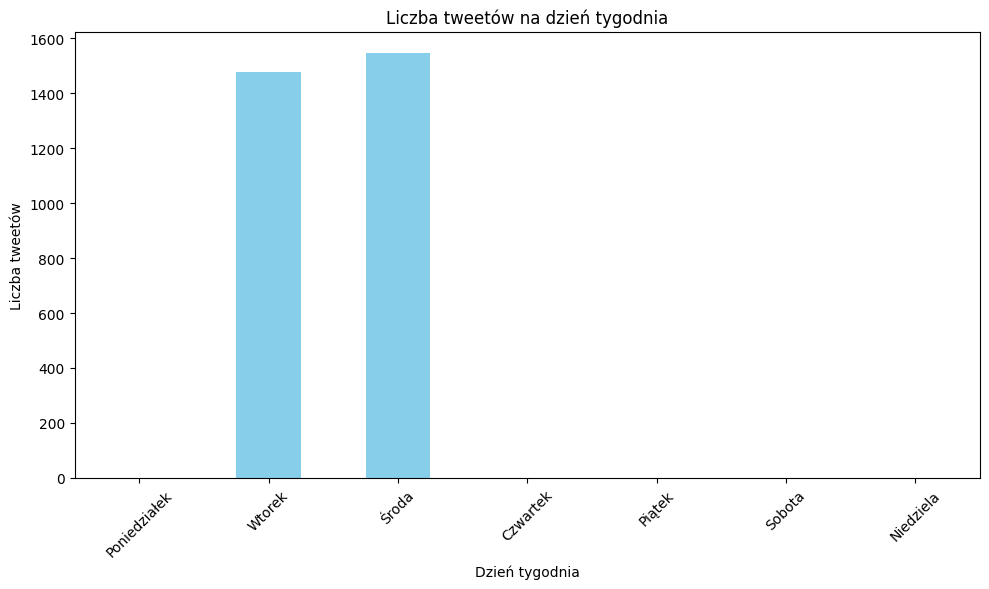

In [21]:
try:
    nlp = spacy.load("pl_core_news_sm")
    def get_ents(text, kind):
        doc = nlp(str(text))
        return [ent.text for ent in doc.ents if ent.label_ == kind]

    df['persons'] = df['text'].apply(lambda x: get_ents(x, "persName"))
    df['places'] = df['text'].apply(lambda x: get_ents(x, "placeName"))
    df['organizations'] = df['text'].apply(lambda x: get_ents(x, "orgName"))
except:
    print("Zainstaluj model spacy 'pl_core_news_sm', aby uruchomić NER.")



order = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
counts = df['dzien_tygodnia'].value_counts().reindex(order)

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Liczba tweetów na dzień tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


df.to_csv('dane_przetworzone.csv', index=False)